## Цели практической работы

* Изучить и предобработать данные в задаче оттока.

* Научиться применять для решения задачи решающие деревья и оценивать результаты модели.

## Что входит в практическую работу

*  Загрузка и предобработка данных.
*  Применение и настройка линейных моделей.
*  Применение и настройка решающего дерева.
*  Сравнение моделей.
*  Оценка важности признаков.

## Что оценивается

Выполнены все задания ноутбука (заполнены пустые ячейки, даны ответы на вопросы).

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [2]:
df = df.drop(["State"], axis=1)
df["International plan"] = df["International plan"].replace({'Yes': 1, 'No': 0})
df["Voice mail plan"] = df["Voice mail plan"].replace({'Yes': 1, 'No': 0})
df["Churn"] = df["Churn"].replace({True: 1, False: 0})

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [3]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [4]:
X = df.drop(["Churn"], axis=1)
y = df["Churn"]

Проверьте баланс классов. Является ли выборка сбалансированной?

In [5]:
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [6]:
# Объектов класса 0 в несколько раз больше, чем объектов класса 1. Выборка несбалансирована.

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [9]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

lr = LogisticRegression()
svc = SVC(kernel='linear', probability=True)

lr.fit(X_train_scaled, y_train)
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте. 

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности (чтобы SVC мог это сделать, при объявлении модели поставьте probability=True).

In [11]:
from sklearn.metrics import roc_auc_score

lr_pred = lr.predict_proba(X_test_scaled)[:, 1]
svc_pred = svc.predict_proba(X_test_scaled)[:, 1]

print("ROC-AUC lr:", roc_auc_score(y_test, lr_pred))
print("ROC-AUC svc:", roc_auc_score(y_test, svc_pred))

ROC-AUC lr: 0.828242935594161
ROC-AUC svc: 0.7400510807745345


Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте и вычислите на тесте roc-auc.

In [12]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
dtc_pred = dtc.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC dtc:", roc_auc_score(y_test, dtc_pred))

ROC-AUC dtc: 0.8350523455540959


Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [13]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict_proba(X_test)[:, 1]
print("ROC-AUC dtc:", roc_auc_score(y_test, dtc_pred))

ROC-AUC dtc: 0.8333020538388101


Какой вывод про масштабирование признаков для обучения дерева можно сделать?

In [14]:
# Точность предсказаний при масштабировании признаков и без масштабирования почти не отличается.
# Масштабирование не влияет на точность предсказаний решающего дерева.

Теперь ваша цель — максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом);

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion — gini или entropy (см. [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

Для подбора параметров используйте [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) с пятью фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (roc_auc).

In [15]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
param_grid = {'C': np.linspace(0.1, 10, 20)}
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)
best_C = grid_search.best_params_['C']

print("Best C:", best_C)

lr = LogisticRegression(C=best_C)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC lr:", roc_auc_score(y_test, lr_pred))

Best C: 1.6631578947368424
ROC-AUC lr: 0.8282674151985704


In [16]:
svc = SVC()
param_grid = {'C': np.linspace(0.1, 10, 20), 'kernel': ['linear']}
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)
best_C = grid_search.best_params_['C']

print("Best C:", best_C)

svc =  SVC(kernel='linear', probability=True, C=best_C)
svc.fit(X_train_scaled, y_train)
svc_pred = svc.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC svc:", roc_auc_score(y_test, svc_pred))

Best C: 0.1
ROC-AUC svc: 0.7468808904048112


In [17]:
dtc = DecisionTreeClassifier()
param_grid = {'max_depth': np.linspace(1, 10, 10), 'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)
best_max_depth = grid_search.best_params_['max_depth']
best_criterion = grid_search.best_params_['criterion']

print("Best max_depth:", best_max_depth)
print("Best criterion:", best_criterion)

dtc = DecisionTreeClassifier(max_depth=best_max_depth, criterion=best_criterion)
dtc.fit(X_train_scaled, y_train)
dtc_pred = dtc.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC dtc:", roc_auc_score(y_test, dtc_pred))

Best max_depth: 5.0
Best criterion: gini
ROC-AUC dtc: 0.9075364542108999


Какая модель справилась с решением задачи лучше всего по метрике roc-auc?

In [18]:
# Лучше всего справилось решающее дерево

Нарисуйте roc-кривую для наилучшей модели.

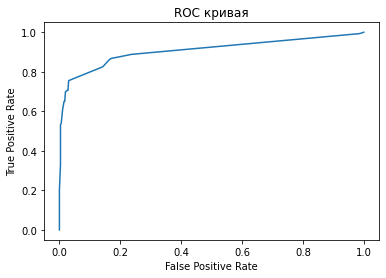

In [19]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_test, dtc_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC кривая')
plt.show()

Сравните между собой две лучшие модели:

1. Насколько сильно отличается качество предсказания на тестовых данных?
(Вычислите разность значений roc-auc.)

2. Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трёх самых важных признаков. Совпадают ли они?

In [20]:
# две лучшие модели: решающее дерево и логистическая регрессия

print('roc-auc_tree - roc-auc_lr:', abs(roc_auc_score(y_test, dtc_pred) - roc_auc_score(y_test, lr_pred)))

roc-auc_tree - roc-auc_lr: 0.07926903901232951


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

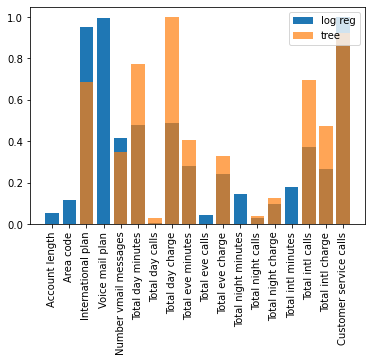

In [42]:
plt.bar(X_train.columns, abs(lr.coef_[0]) / max(abs(lr.coef_[0])), label='log reg')
plt.bar(X_train.columns, abs(dtc.feature_importances_) / max(abs(dtc.feature_importances_)), alpha=0.7, label='tree')
plt.legend(loc='upper right')
plt.xticks(rotation=90)

In [25]:
coef_df = pd.DataFrame({'feature': X_train.columns, 'coef': abs(lr.coef_[0])})

sorted_coef_df = coef_df.sort_values(by='coef', ascending=False)

sorted_coef_df[:3]

,feature,coef
17,Customer service calls,0.664542
3,Voice mail plan,0.661538
2,International plan,0.633264


In [26]:
coef_df = pd.DataFrame({'feature': X_train.columns, 'coef': abs(dtc.feature_importances_)})

sorted_coef_df = coef_df.sort_values(by='coef', ascending=False)

sorted_coef_df[:3]

,feature,coef
7,Total day charge,0.171672
17,Customer service calls,0.158061
5,Total day minutes,0.132807


Сделайте выводы:

1. Являются ли данные сбалансированными? Что это означает?

2. Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

3. Одинаковые ли признаки важны для работы двух наилучших моделей? Почему?

In [ ]:
# 1. Объектов класса 0 в несколько раз больше, чем объектов класса 1. Выборка несбалансирована.
# 2. Лучше всего справилось решающее дерево.
# 3. Для двух наилучших моделей среди трех наиболее важных признаков оказался только один общий.
#    Это можно объяснить тем, что для подбора наиболее выжных признаков в моделях используются разные алгоритмы.